In [1]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records.csv')

In [31]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,age_group_encoded,age_group_int
0,40.0,0,478,1,30,0,303000.0,0.9,136,1,0,148,0,Young Adult,3,0
1,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0,Young Adult,3,0
2,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187,0,Young Adult,3,0
3,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0,Young Adult,3,0
4,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212,0,Young Adult,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [6]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299,299.000000,299,299.000000,299,299.000000,299.00000,299.000000,299,299,299.000000,299
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,No,NaN,No,NaN,No,NaN,NaN,NaN,Male,No,NaN,No
freq,NaN,170,NaN,174,NaN,194,NaN,NaN,NaN,194,203,NaN,203
mean,60.833893,NaN,581.839465,NaN,38.083612,NaN,263358.029264,1.39388,136.625418,NaN,NaN,130.260870,NaN
std,11.894809,NaN,970.287881,NaN,11.834841,NaN,97804.236869,1.03451,4.412477,NaN,NaN,77.614208,NaN
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.50000,113.000000,NaN,NaN,4.000000,NaN
25%,51.000000,NaN,116.500000,NaN,30.000000,NaN,212500.000000,0.90000,134.000000,NaN,NaN,73.000000,NaN
50%,60.000000,NaN,250.000000,NaN,38.000000,NaN,262000.000000,1.10000,137.000000,NaN,NaN,115.000000,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303500.000000,1.40000,140.000000,NaN,NaN,203.000000,NaN


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
#create a new columns called age_group
labels = ['Young Adult','Adult','Middle-aged','Senior']
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)

In [9]:
df[['age','age_group']].head(10)

,age,age_group
0,40.0,Young Adult
1,40.0,Young Adult
2,40.0,Young Adult
3,40.0,Young Adult
4,40.0,Young Adult
5,40.0,Young Adult
6,40.0,Young Adult
7,41.0,Young Adult
8,42.0,Young Adult
9,42.0,Young Adult


In [10]:
for col in ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']:
    print(col, df[col].unique())


anaemia ['No' 'Yes']
diabetes ['Yes' 'No']
high_blood_pressure ['No' 'Yes']
sex ['Male' 'Female']
smoking ['No' 'Yes']
DEATH_EVENT ['No' 'Yes']


In [11]:
df['anaemia'] = df['anaemia'].map({'No': 0, 'Yes': 1})
df['diabetes'] = df['diabetes'].map({'No': 0, 'Yes': 1})
df['high_blood_pressure'] = df['high_blood_pressure'].map({'No': 0, 'Yes': 1})
df['smoking'] = df['smoking'].map({'No': 0, 'Yes': 1})
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df['DEATH_EVENT'] = df['DEATH_EVENT'].map({'No': 0, 'Yes': 1})


In [32]:
# Define a mapping from age group names to integers
age_mapping = {
    'Young Adult': 0,
    'Adult': 1,
    'Middle-aged': 2,
    'Senior': 3
}

# Apply the mapping to create a numeric column
df['age_group_int'] = df['age_group'].map(age_mapping)

# Check if it worked
print(df[['age_group', 'age_group_int','age_group_encoded']])


       age_group age_group_int  age_group_encoded
0    Young Adult             0                  3
1    Young Adult             0                  3
2    Young Adult             0                  3
3    Young Adult             0                  3
4    Young Adult             0                  3
..           ...           ...                ...
294       Senior             3                  2
295       Senior             3                  2
296       Senior             3                  2
297       Senior             3                  2
298       Senior             3                  2

[299 rows x 3 columns]


In [36]:
# Convert age_group_int to int for correlation
df['age_group_int'] = df['age_group_int'].astype(int)
df = df.drop(columns=['age_group_encoded'])


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    int64   
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    int64   
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    int64   
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    int64   
 10  smoking                   299 non-null    int64   
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
 13  age_group                 299 non-null    category

In [24]:
!pip install seaborn
!pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - ---------------------

Correlation of numeric features with DEATH_EVENT:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
age_group_int               0.186624
creatinine_phosphokinase    0.062728
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


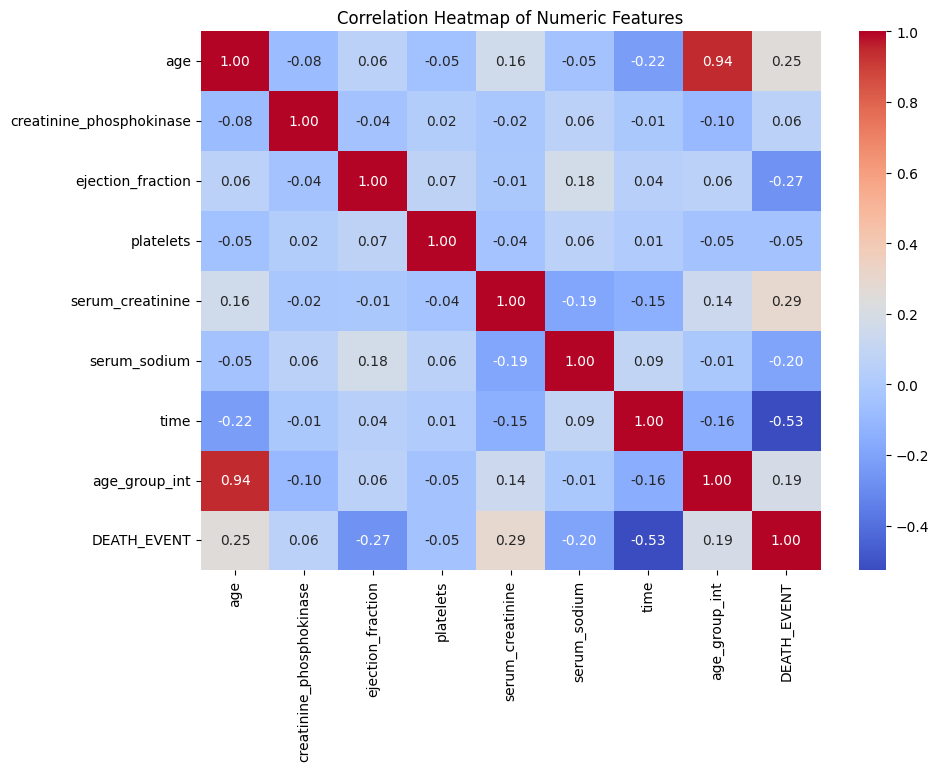

In [38]:

import seaborn as sns
import matplotlib.pyplot as plt

# Numeric features we care about
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                'platelets', 'serum_creatinine', 'serum_sodium',
                'time', 'age_group_int', 'DEATH_EVENT']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print correlations with death
print("Correlation of numeric features with DEATH_EVENT:")
print(corr_matrix['DEATH_EVENT'].sort_values(ascending=False))

# Visualize correlation as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


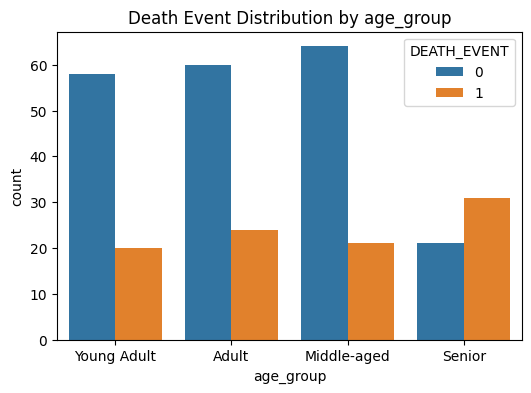

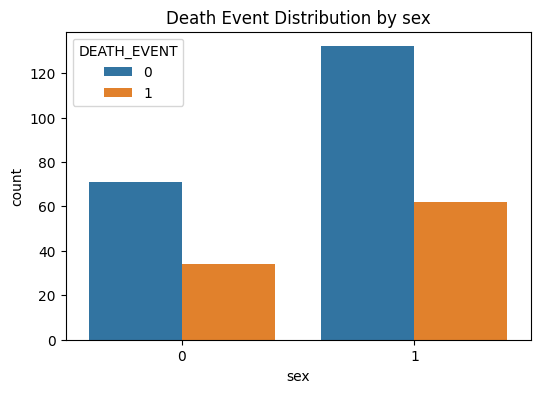

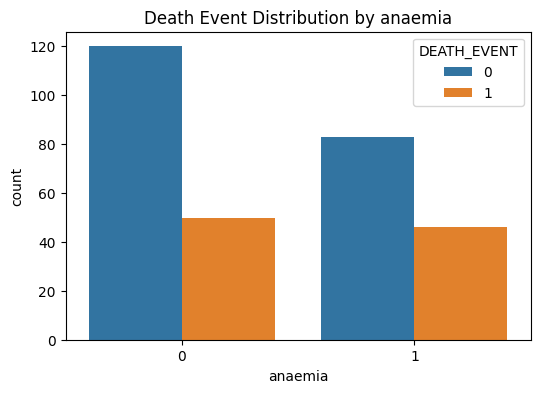

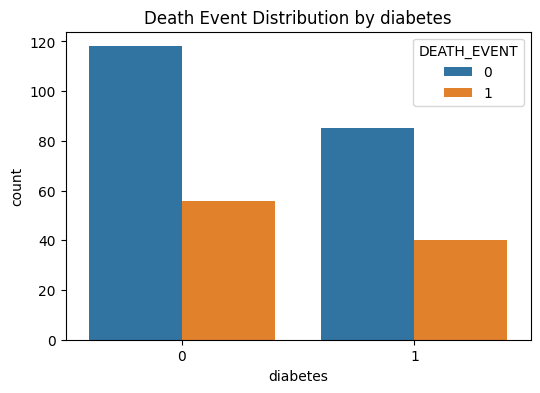

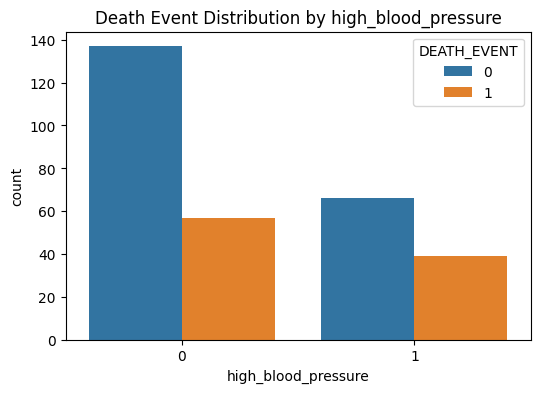

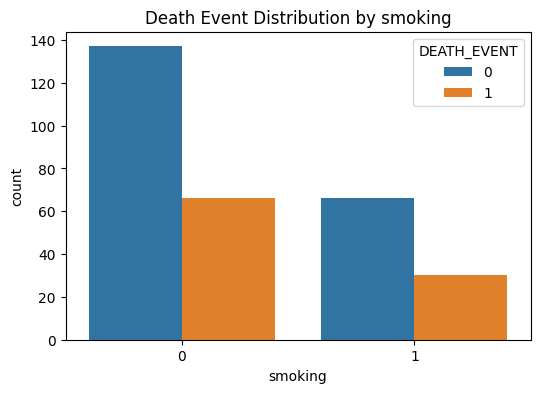

In [28]:
categorical_cols = ['age_group', 'sex', 'anaemia', 'diabetes',
                    'high_blood_pressure', 'smoking']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='DEATH_EVENT', data=df)
    plt.title(f"Death Event Distribution by {col}")
    plt.show()

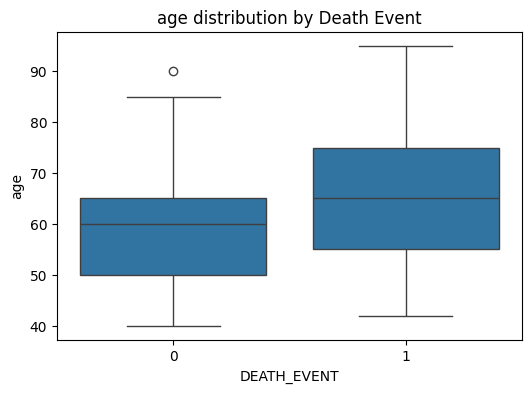

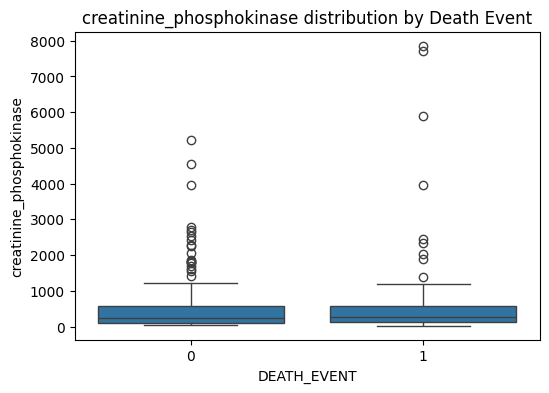

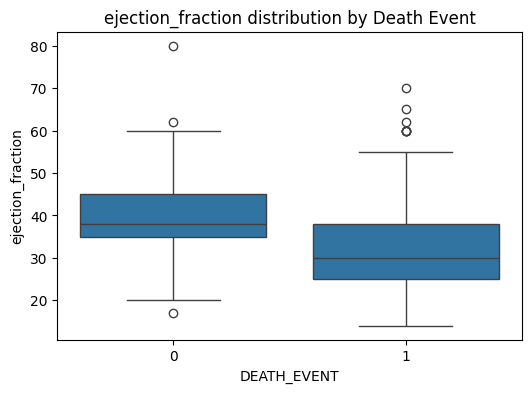

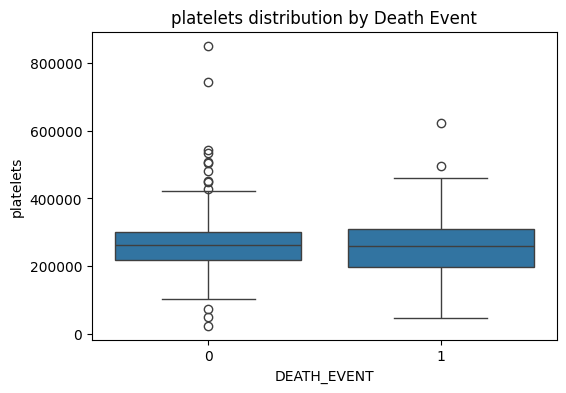

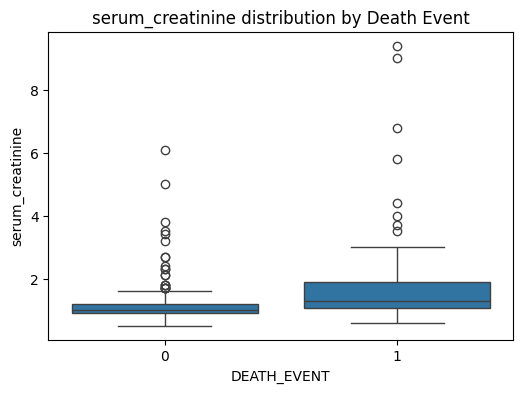

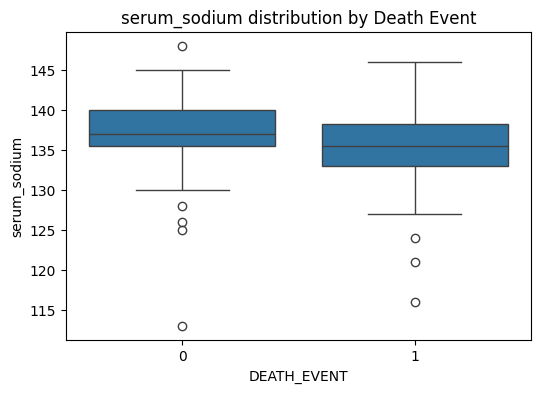

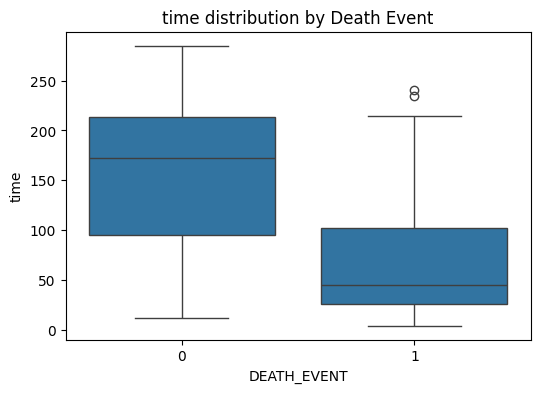

In [29]:
numeric_for_boxplot = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                       'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in numeric_for_boxplot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title(f"{col} distribution by Death Event")
    plt.show()


In [39]:
summary_table = df.groupby('DEATH_EVENT')[numeric_for_boxplot].mean()
print("Summary Table of Numeric Features by DEATH_EVENT:")
print(summary_table)

Summary Table of Numeric Features by DEATH_EVENT:
                   age  creatinine_phosphokinase  ejection_fraction  \
DEATH_EVENT                                                           
0            58.761906                540.054187           40.26601   
1            65.215281                670.197917           33.46875   

                 platelets  serum_creatinine  serum_sodium        time  
DEATH_EVENT                                                             
0            266657.489901          1.184877    137.216749  158.339901  
1            256381.044792          1.835833    135.375000   70.885417  


In [40]:
df.to_csv('heart_failure_cleaned.csv', index=False)


In [41]:
from IPython.display import FileLink

# Make a download link for CSV
FileLink('heart_failure_cleaned.csv')


C:\Users\gcom4\heart_failure_cleaned.csv

In [43]:
from IPython.display import HTML

# Create a proper download link
HTML('<a href="heart_failure_cleaned.csv" download="heart_failure_cleaned.csv">Click here to download CSV</a>')
